In [7]:
###··· A3 DATASET ···### 
# Part 1: Selecting and analyzing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#Load the dataset
dataset = pd.read_csv("A3-iris-data.csv", header=0, na_values = "?", sep=",")
x = dataset.iloc[:,0:4].values
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x, columns=['x1', 'x2', 'x3', 'x4'])

le = preprocessing.LabelEncoder()
y = le.fit_transform(dataset.iloc[:,4].values)

# ------------------------------------------------------------------------------ #
def plot_correlation_matrix(principal_components, predicted_labels, k_values):
    label_mapping = {}
    for i in range(k_values):
        # Find the most common true label for each cluster label
        most_common = mode(y[predicted_labels == i])[0][0]    
        label_mapping[i] = most_common
    # Apply the mapping to the predicted labels
    predicted_labels_mapped = [label_mapping[label] for label in predicted_labels]

    sns.scatterplot(x='PC1', 
                    y='PC3', 
                    data=principal_components, 
                    hue=predicted_labels_mapped,
                    palette='rainbow').set_title('predicted Results')
    plt.show()

    sns.scatterplot(x='PC1', 
                    y='PC3', 
                    data=principal_components, 
                    hue=y.values.flatten(),
                    palette='rainbow').set_title('Expected Results')
    plt.show()
    return predicted_labels_mapped
# ------------------------------------------------------------------------------ #

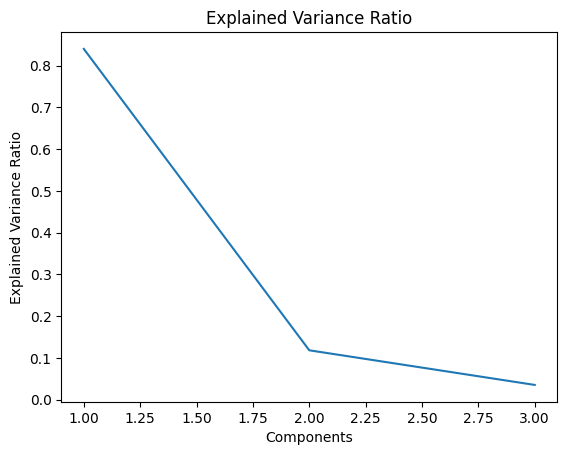

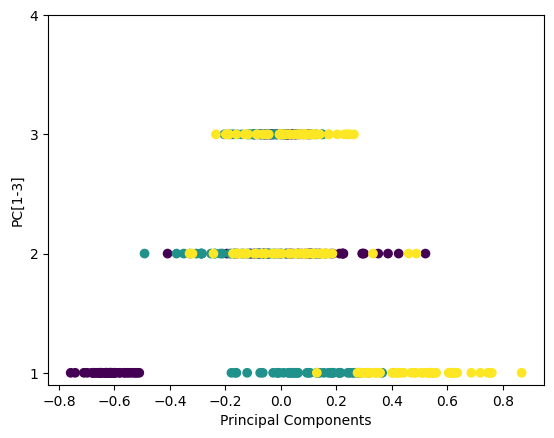

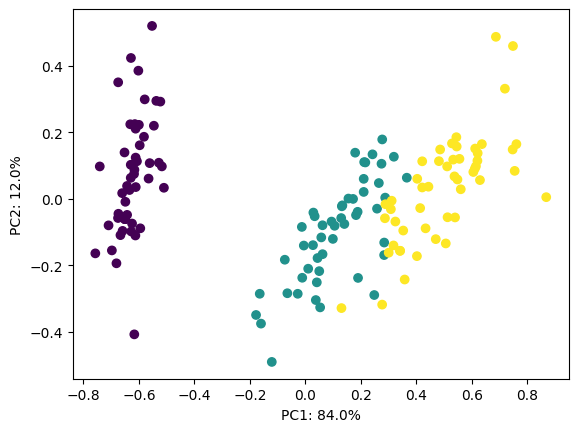

In [8]:
from sklearn.decomposition import PCA
# Part 2.a: Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)

# Add the class information to the principal components
p_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
p_df['class'] = y

# Plot the explained variance ratio
x_modified = np.arange(1, 4, 1)
plt.plot(x_modified, pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

# Plot the principal components
plt.scatter(p_df['PC1'], np.zeros(len(p_df))+1, c=p_df['class'])
plt.scatter(p_df['PC2'], np.zeros(len(p_df))+2, c=p_df['class'])
plt.scatter(p_df['PC3'], np.zeros(len(p_df))+3, c=p_df['class'])
plt.xlabel('Principal Components')
plt.ylabel('PC[1-3]')
plt.yticks(np.arange(1, 5, 1))
plt.show()

# Plot the first two principal components
plt.scatter(p_df['PC1'], p_df['PC2'], c=p_df['class'])
plt.xlabel('PC1: ' + str(round(pca.explained_variance_ratio_[0], 2) * 100)  + '%')
plt.ylabel('PC2: ' + str(round(pca.explained_variance_ratio_[1], 2) * 100) + '%')
plt.show()


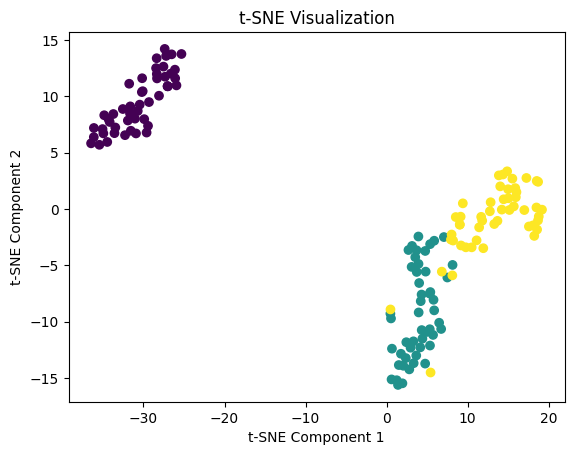

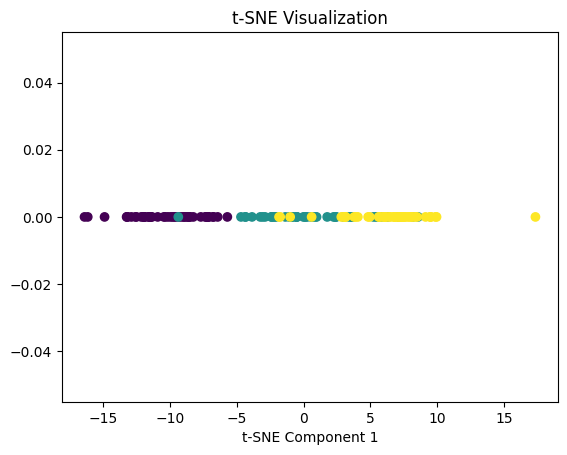

In [9]:
from sklearn.manifold import TSNE

# Create t-SNE object
tsne = TSNE(n_components=2, perplexity=20, n_iter=1000)
# Apply t-SNE on the x values
x_tsne = tsne.fit_transform(x)

x_tsne_df = pd.DataFrame(data=x_tsne, columns=['tsne1', 'tsne2'])
x_tsne_df['class'] = y

# Plot the t-SNE results
plt.scatter(x_tsne_df['tsne1'], x_tsne_df['tsne2'], c=x_tsne_df['class'])
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization')
plt.show()

tsne = TSNE(n_components=1, perplexity=4, n_iter=250, random_state=0)
# Apply t-SNE on the x values
x_tsne = tsne.fit_transform(x)

x_tsne_df = pd.DataFrame(data=x_tsne, columns=['tsne1'])
x_tsne_df['class'] = y

# Plot the t-SNE results
plt.scatter(x_tsne_df['tsne1'],np.zeros(len(p_df)), c=x_tsne_df['class'])
plt.xlabel('t-SNE Component 1')
plt.title('t-SNE Visualization')
plt.show()

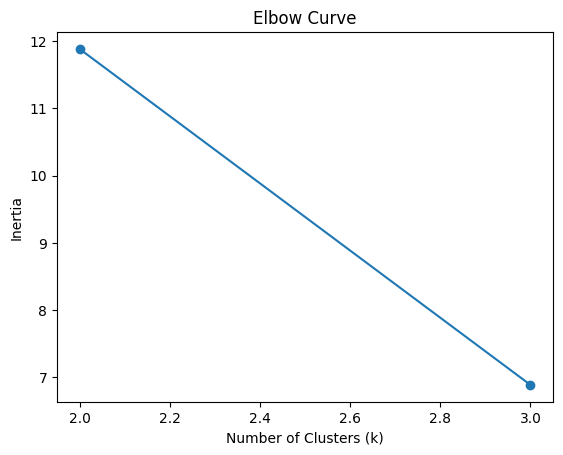

IndexError: invalid index to scalar variable.

In [10]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics
import seaborn as sns


# Perform PCA
pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
# Apply k-means clustering for different values of k
k_values = range(2, np.unique(y).size + 1)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=1, max_iter=100)   
    kmeans.fit(principal_components)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Determine the optimal number of clusters using the Elbow method
optimal_k = 3

# Perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=1, max_iter=100)
kmeans.fit_predict(principal_components)
predicted_labels = kmeans.labels_

# Map the predicted cluster labels to the actual labels
predicted_labels_mapped = plot_correlation_matrix(principal_components, predicted_labels, optimal_k)

# Plot the confusion matrix
confusion_mat = metrics.confusion_matrix(y, predicted_labels_mapped)
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Y Class')
plt.ylabel('Predicted kmeans Class')
plt.title('Confusion Matrix')
plt.show()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(y.values.flatten(), predicted_labels_mapped))
print("Completeness: %0.3f" % metrics.completeness_score(y.values.flatten(), predicted_labels_mapped))
print("V-measure: %0.3f" % metrics.v_measure_score(y.values.flatten(), predicted_labels_mapped))
print("Accuracy score: %0.3f" % metrics.accuracy_score(y.values.flatten(), predicted_labels_mapped))


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


pca = PCA(n_components=3)
principal_components = pca.fit_transform(x)
principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

upgma = AgglomerativeClustering(n_clusters=6, linkage='average', metric='euclidean')
upgma_labels = upgma.fit_predict(principal_components)

plot_correlation_matrix(principal_components, upgma_labels, 6)

# Perform hierarchical clustering using the linkage function
linked_upgma = linkage(principal_components, method='average', metric='euclidean')

# Perform hierarchical clustering
dendrogram(linked_upgma, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

cl = AgglomerativeClustering(n_clusters=6, linkage='complete', metric='euclidean')
cl_labels = cl.fit_predict(principal_components)

plot_correlation_matrix(principal_components, cl_labels, 6)

# Perform hierarchical clustering using the linkage function
linked_cl = linkage(principal_components, method='complete', metric='euclidean')

# Perform hierarchical clustering
dendrogram(linked_cl, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()



In [ ]:
from sklearn import datasets
from minisom import MiniSom    
from sklearn.metrics import accuracy_score
from collections import Counter

# Define the parameter variations
learning_rates = [0.1, 0.5, 1.0]
neighborhood_functions = ['gaussian', 'mexican_hat']
som_sizes = [(10, 10), (15, 15), (20, 20)]
num_iterations = [100, 200, 500]
sigmas = [0.5, 1.0, 2.0]

accuracy = []
params = []
# Iterate over the parameter variations
for learning_rate in learning_rates:
    for neighborhood_function in neighborhood_functions:
        for num_iteration in num_iterations:
            for sigma in sigmas:
                for som_size in som_sizes:
                    # Perform PCA
                    pca = PCA(n_components=3)
                    principal_components = pca.fit_transform(x)
                    principal_components = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

                    # Create the SOM object
                    som = MiniSom(som_size[0], som_size[1], 4, learning_rate=learning_rate, neighborhood_function=neighborhood_function, sigma=sigma)
                    som.train(x.values, num_iteration=num_iteration)
                    # Get the predicted labels from the SOM
                    predicted_labels = [som.winner(x.values[i])[1] for i in range(len(x.values))]
                    # Calculate the accuracy score
                    accuracy.append(accuracy_score(y, predicted_labels))
                    # Save the configuration params and the accuracy score in a list
                    params.append([learning_rate, neighborhood_function, num_iteration, som_size])

# Find the best performing parameter combination
best_params = params[np.argmax(accuracy)]
# Print the best performing parameter combination
print("Best performing parameter combination: ")
print("Learning rate: " + str(best_params[0]))
print("Neighborhood function: " + str(best_params[1]))
print("Number of iterations: " + str(best_params[2]))
print("SOM size: " + str(best_params[3]))
print("Accuracy: " + str(max(accuracy)))

som = MiniSom(best_params[3][0], best_params[3][1], 4, learning_rate=best_params[0], neighborhood_function=best_params[1])
som.train(x.values, num_iteration=best_params[2])
predicted_labels = [som.winner(x.values[i])[1] for i in range(len(x.values))]
#transform predicted_labels into array
predicted_labels = np.array(predicted_labels)

# Plot label predictions vs actual labels
predicted_labels_mapped = plot_correlation_matrix(principal_components, predicted_labels, best_params[3][0] * best_params[3][1])
                                                  
# Plot the confusion matrix
confusion_mat = metrics.confusion_matrix(y, predicted_labels_mapped)
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Y Class')
plt.ylabel('Predicted SOM Class')
plt.title('Confusion Matrix')
plt.show()